# K-Means Clustering

Elaborado por Yurandir Santana - 18001546.

In [2]:
# Librerías

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

## k-Media en un dataset generado aleatoriamente

In [3]:
np.random.seed(0)

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

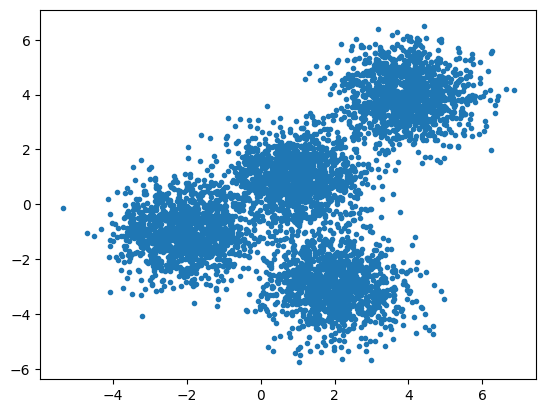

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

### Estableciendo K-Means

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [7]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### Creando la trama

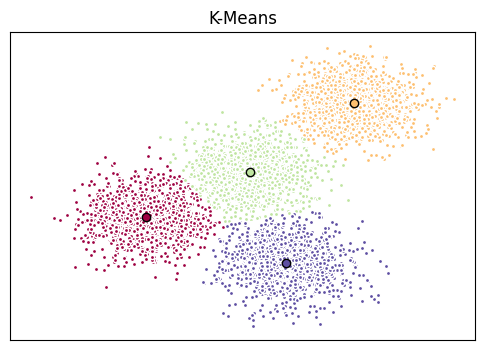

In [12]:
# Inicializar el dibujo con las dimensiones especificadas
fig = plt.figure(figsize=(6, 4))
# Los colores usan un mapa de color, dónde produciremos un arreglo de colores basados en
# el número de etiquetas que hay. Usaremos set(k_means_labels) para obtener
# etiquetas univocas
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
# Crear un dibujo
ax = fig.add_subplot(1, 1, 1)
# Loop For que dibuja los puntos de datos y los centroides.
# k tomará valores entre 0-3, los cuales coincidirán con los clusters posibles en el
# que está cada punto.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Crear una lista de todos los puntos, donde aquellos que están
    # en el cluster (ej. cluster 0) están etiquetados como verdadero, o en su defecto
    # estarán etiquetados como falso.
    my_members = (k_means_labels == k)

    # Definir el centroide o centro del cluster.
    cluster_center = k_means_cluster_centers[k]

    # Dibjuar los puntos de datos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Dibujo de los centroides con un color específico pero una linea más oscura
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Título del dibujo
ax.set_title('K-Means')
# Eliminar los ticks del eje x
ax.set_xticks(())
# Eliminar los ticks del eje y
ax.set_yticks(())
# Mostrar el dibujo
plt.show()

## Práctica

Probar de agrupar el set de datos en 3 clusters.  Nota: no vuelvas a generar los datos utiliza el mismo dataset de antes.

In [13]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

k_means.fit(X)

k_means_labels = k_means.labels_
k_means_labels

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.70503248,  3.70030577],
       [-0.8042542 , -0.16952334],
       [ 2.02030226, -2.94614399]])

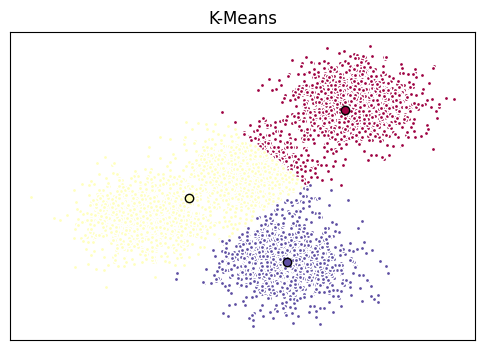

In [14]:
# Inicializar el dibujo con las dimensiones especificadas
fig = plt.figure(figsize=(6, 4))
# Los colores usan un mapa de color, dónde produciremos un arreglo de colores basados en
# el número de etiquetas que hay. Usaremos set(k_means_labels) para obtener
# etiquetas univocas
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
# Crear un dibujo
ax = fig.add_subplot(1, 1, 1)
# Loop For que dibuja los puntos de datos y los centroides.
# k tomará valores entre 0-3, los cuales coincidirán con los clusters posibles en el
# que está cada punto.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Crear una lista de todos los puntos, donde aquellos que están
    # en el cluster (ej. cluster 0) están etiquetados como verdadero, o en su defecto
    # estarán etiquetados como falso.
    my_members = (k_means_labels == k)

    # Definir el centroide o centro del cluster.
    cluster_center = k_means_cluster_centers[k]

    # Dibjuar los puntos de datos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Dibujo de los centroides con un color específico pero una linea más oscura
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Título del dibujo
ax.set_title('K-Means')
# Eliminar los ticks del eje x
ax.set_xticks(())
# Eliminar los ticks del eje y
ax.set_yticks(())
# Mostrar el dibujo
plt.show()

# Segmentación de Cliente con K-Means

In [15]:
import pandas as pd

url = 'https://raw.githubusercontent.com/yurandirsantana/UGalileo2023/MainBranch/Statistical%20Learning%201/K-Means/Cust_Segmentation.csv'
cust_df = pd.read_csv(url)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [16]:
# Pre-procesamiento

df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [17]:
# Normalizando el desvío estándar

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [18]:
# Modeling

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [19]:
# Descubrimientos

df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [20]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


<ipython-input-22-2a5b058eb750>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


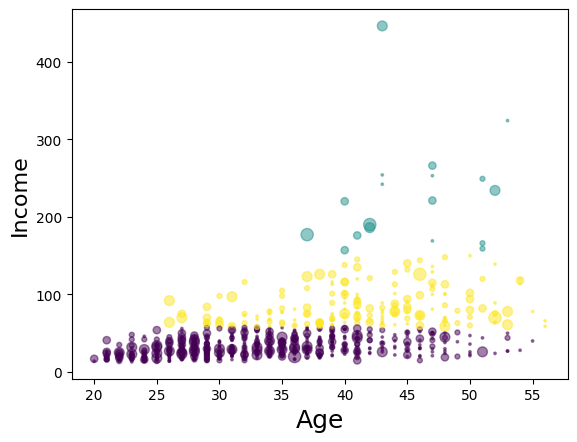

In [22]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

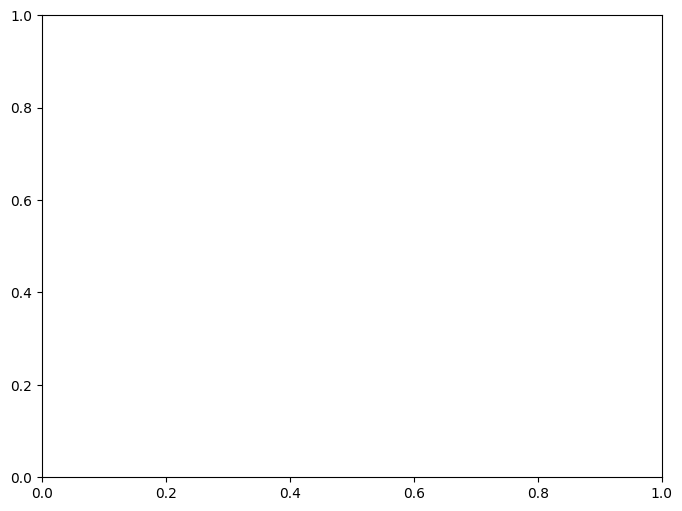

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))